## First steps

This notebook will explore the building blocks of Tensor Flow. We start with the usal set of imports (numpy, tensorflow and keras)

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

### Building a basic Neural Network

The easiest example to start with is to build a neural "network" that will only have one perceptron. The pattern with larger topologies will be similar, in which:
* First you define the topology or _model_, using Sequential and Layers (with different types of layers)
* Second, you _compile_ using keras lingo the neural network, defining the loss function and optimizer (i.e. in general least squares and stochastic gradient descent)
* Thirdly, you fit the training set using the model
* Finally, you predict on the testing set

In [4]:
model = tf.keras.Sequential(tf.keras.layers.Dense(units=1, input_shape=[1]))

NameError: ignored

In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
ys = np.array([-2.5, -0.5, 1.5, 3.5, 5.5, 7.5, 9.5], dtype=float)
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5601
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4308
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 0.3410
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2784
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.2035
Epoch 7/500
1/1 [==============================] - 0s 954us/step - loss: 0.1814
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1655
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1537
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1449
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1381
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 13/500
1/1 [==============================] - 0s 1ms/

In [5]:
print(model.predict([8.0]))

[[15.494376]]


## From the Hello World of NNs to Image classifier

We can now leverage on the tools we have seen so far and build a Neural Network that will be able to classify fashion images coming from the fashion MNIST set into 10 different categories.

Even if the problem seems to be much more complex (imagine implementing that using a traditional programming paradigm), the solution will be similar. Instead of solving the problem by feeding input data and rules to get an output, we will feed it with input data and output data, so it learns what those rules are.

In this example, we will see that the NN to be built will be a bit more complex. The first layer will flatten the pixels of the image so we go from a 28x28 matrix to a vector of 844 elements. This will be in turn fed to a hidden layers (we will play with the dimension), which will then provide intermediary results to the final layer, which implements a softmax classifier.

In [6]:
# load data
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()
 

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

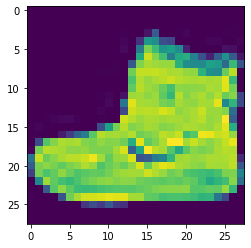

In [7]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [0]:
# Normalise the data (by dividing by 255)
training_images = training_images / 255.0
test_images = test_images / 255.0

In [0]:
model_vision = tf.keras.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

*TODO*: This is probably a good point to stop to explore what are the most common types of layers we can encounter, as well as a brief comment on the activation functions we can have for each layer.

In [0]:
model_vision.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model_vision.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3119 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8920


In [12]:
model_vision.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8745


[0.3482617139816284, 0.8744999766349792]

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [14]:
history.history['accuracy']

[0.8257499933242798,
 0.8644833564758301,
 0.8761833310127258,
 0.8844666481018066,
 0.8919666409492493]

## Introduction to callbacks

Functions that can get called at certain points during the training of the neural network. One particularly useful case is to for example stop training when we have reached a certain threshold for the loss function. This can be checked on_epoch_end. The example below implements this idea.

## Other useful layers for computer vision: Convolutions and Pooling
https://bit.ly/2UGa7uH
